> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

  The choosen dataset contains data of 10,000 movies from The Movie Database (TMDb).

##### The column names in the dataset are listed below and explains the data they hold:
- **_id_** - movie id
- **_imdb_id_** - imdb id
- **_popularity_** - how popular the movie is
- **_budget_** - amount of money spent to make the movie
- **_revenue_** - income recieved for making the movie
- **_original_title_** - title of the movie
- **_cast_** - the main actors and actresses in the movie
- **_homepage_** - website showing information about movie
- **_director_** - movie director
- **_tagline_** - quote from movie
- **_keywords_** - keywords about movie
- **_overview_** - explaination of what movie is about
- **_runtime_** - minutes the movie lasted
- **_genres_** - genres that movies fit in
- **_production_companies_** - companies that funded creating the movie
- **_release_date_** - date movie was released
- **_vote_count_** - amount of votes for movie
- **_vote_average_** - average of votes for movie
- **_release_year_** - year movie was released
- **_budget_adj_** - amount of money spent to make movie in terms of 2010 dollars
- **_revenue_adj_** - amount of money earned from making movie in terms of 2010 dollars 

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

### 1. Which genres are most popular from year to year?
### 2. What movie genre will Tom Cruise most likely to be asked to star in?

In [1684]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

### **Cell 1:**

In [1685]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

df = pd.read_csv('tmdb-movies.csv') # loads csv file
df.head() # displays first 5 lines of raw data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### **Cell 2:**

In [1686]:
df['keywords'] # displays "keywords" column data (ONLY column that was NOT SHOWN)

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

### **Cell 3:**

In [1687]:
df.shape # displays size of dataframe 

(10866, 21)

### **Cell 4:**

In [1688]:
df.count() # displays amount of NON-missing data in each column (only want to know LOCATION of null values in Columns)

# if ".isnull()", "isna()", or ".notnull()" is used, it will display "True" or "False" in columns

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

##### The data above displays the amount of data values each column has. Since the dataset has 10866 rows, any column that has less than 10866 data values has null values. This shows that the following columns have null values: **imdb_id**, **cast**, **homepage**, **director**, **tagline**, **keywords**, **overview, genres, and production_companies.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### **Cell 1:**

In [1689]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.fillna(0)#, inplace=True) # replaces null values with 0 (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
df[['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']].tail() # displays last 5 lines of raw data for columns: 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', and 'production_companies'

,imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies
10861,tt0060371,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",Documentary,Bruce Brown Films
10862,tt0060472,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...
10863,tt0060161,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,Mystery|Comedy,Mosfilm
10864,tt0061177,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",Action|Comedy,Benedict Pictures Corp.
10865,tt0060666,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,Horror,Norm-Iris


##### Since the previous code cell confirmed that the dataset has null values, those null values, _NaN_, need to be replaced with a reasonable value. The first line of code in the cell above replaces the null values with 0. The second line of code displays the last five rows of raw data to show where some of the null values have been replaced with 0. If a row has a data value of 0, it means the row does not have the data about the movie pertaining to the column it is under.

### **Cell 2:**

In [1690]:
#df.duplicated(keep=True) # shows DUPLICATED rows (returns ERROR)

duplicated_rows = df[df.duplicated()] # obtains duplicated rows ONLY
print(duplicated_rows) # displays duplicated rows

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


##### In the code cell above, the first line of code searches and obtains rows with duplicated data in the dataset. The second line of code displays any duplicated rows that were found. The result from the code cell shows that row 2090 is the only duplicated row in the dataset.

### **Cell 3:**

In [1691]:
sum(df.duplicated()) # displays amount of duplicated rows

1

##### The code in _Cell 3_ displays the total amount of duplicated rows in the dataset. The result shows that there is only **1** duplicated row in the dataset, confirming that row 2090 is the only duplicated row.

### **Cell 4:**

In [1692]:
df.drop_duplicates()#inplace=False) # drops or deletes duplicated rows (MUST USE "inplace=False" TO ENSURE DATA FRAME IS MODIFIED)
df.iloc[[2089, 2090, 2091]] # displays rows 2089-2091 to check if row 2090 was dropped

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2091,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,...,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,9/10/10,78,5.9,2010,25000000.0,15478800.0


##### Since there is one duplicated cell in the dataset, it needs to be removed. In _Cell 4_, the first line of code drops the duplicated row in the dataset. The second line displays rows 2089, 2090, and 2091. The second code line is used to confirm if row 2090 was dropped.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Which genres are most popular from year to year?

#### **Cell 1:**

In [1785]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_genre_popularity_comparison_1 = pd.DataFrame([[0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0]],
                                                index = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 
                                                         'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War'],
                                                columns=['2008', '2009']) # creates dataframe to hold popularity of genre types for first comparison

df_genre_popularity_comparison_2 = pd.DataFrame([[0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0]],
                                                index=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
                                                       'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War'],
                                                columns=['2009', '2010']) # creates dataframe to hold popularity of genre types for second comparison

df_genre_popularity_comparison_3 = pd.DataFrame([[0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0], [0, 0], 
                                                 [0, 0], [0, 0], [0, 0]],
                                                index = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 
                                                         'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War'],
                                                columns=['2010', '2011']) # creates dataframe to hold popularity of genre types for third comparison

The code in _Cell 1_ creates three new dataframe to hold the total popularity of each movie genre released from 2008 to 2011 and initalizes all the dataframe index values to zero. The dataframe index values are initialized to zero because data has not been inputted into the dataframe.

One method to find the most popular genres from year to year is to find which genre popularities increased or stayed the same between two consecutive years and check if those genres had the most popularity for the same consecutive years. This method will be used three times to find and compare three results of popular genres between three pairs of consecutive years. Since two years are the minimum amount needed to find the most popular genres from year to year, the genre popularity will be compared within a range of four years to make the three comparisons of the genre popularity between 2008-2009, 2009-2010, and 2010-2011. These comparisons will narrow down and corroborate which genres are the most popular from year to year.

#### **Cell 2:**

In [1786]:
df_genre_popularity_comparison_1 # displays genre popularity dataframe for first comparison

,2008,2009
Action,0,0
Adventure,0,0
Animation,0,0
Comedy,0,0
Crime,0,0
Drama,0,0
Documentary,0,0
Family,0,0
Fantasy,0,0
Foreign,0,0


The code in _Cell 2_ displays the **df_genre_popularity_comparison_1** dataframe that was created in _Cell 1_. 

This shows that the **df_genre_popularity_comparison_1** dataframe is empty and will not have any unwanted data values tampering with the real results when it is time to graph them.

#### **Cell 3:**

In [1787]:
df_genre_popularity_comparison_2 # displays genre popularity dataframe for second comparison

,2009,2010
Action,0,0
Adventure,0,0
Animation,0,0
Comedy,0,0
Crime,0,0
Drama,0,0
Documentary,0,0
Family,0,0
Fantasy,0,0
Foreign,0,0


The code in _Cell 3_ displays the **df_genre_popularity_comparison_2** dataframe that was created in _Cell 1_. 

This shows that the **df_genre_popularity_comparison_2** dataframe is empty and will not have any unwanted data values tampering with the real results when it is time to graph them.

#### **Cell 4:**

In [1788]:
df_genre_popularity_comparison_3 # displays genre popularity dataframe for third comparison

,2010,2011
Action,0,0
Adventure,0,0
Animation,0,0
Comedy,0,0
Crime,0,0
Drama,0,0
Documentary,0,0
Family,0,0
Fantasy,0,0
Foreign,0,0


The code in _Cell 4_ displays the **df_genre_popularity_comparison_3** dataframe that was created in _Cell 1_. 

This shows that the **df_genre_popularity_comparison_3** dataframe is empty and will not have any unwanted data values tampering with the real results when it is time to graph them.

#### **Cell 5:**

In [1789]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df_2008 = df[df['release_year'] == 2008] # creates dataframe with movies released in 2008
df_2009 = df[df['release_year'] == 2009] # creates dataframe with movies released in 2009
df_2010 = df[df['release_year'] == 2010] # creates dataframe with movies released in 2010
df_2011 = df[df['release_year'] == 2011] # creates dataframe with movies released in 2011

The code in _Cell 5_ creates four dataframes to hold the movies released during 2008-2011 separately. To fill the genre popularity dataframe with the appropriate values, the popularity needs to be distinguished by the year the movie was released and the movie genre. Since there are less years to differentiate the popularity by, four dataframes were created to hold the movies based on the year released from 2008 to 2011.

#### **Cell 6:**

In [1790]:
index_names = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 
               'TV Movie', 'War'] # Series to hold "df_genre_popularity" index names (MUST USE THIS TO PREVENT ERROR FROM OCCURING when accessing data from "df_genre_popularity" dataframe)

The code in _Cell 6_ creates a series array to hold the names of each genre in the **df_genre_popularity** dataframe.

This series will allow functions to use to the index word of the **df_genre_popularity** dataframe to access the data inside the dataframe without causing errors.

#### **Cell 7:**

In [1791]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2008 = df_2008['genres'].str.contains('Action', regex=False) # checks if "genres" column has "Action" ("regex=False" makes case-insensitive)
adventure_boolean_2008 = df_2008['genres'].str.contains('Adventure', regex=False) # checks if row has "Adventure" genre
animation_boolean_2008 = df_2008['genres'].str.contains('Animation', regex=False) # checks if row has "Animation" genre
comedy_boolean_2008 = df_2008['genres'].str.contains('Comedy', regex=False) # checks if Value In Column contains "Comedy"
crime_boolean_2008 = df_2008['genres'].str.contains('Crime', regex=False) # checks if Value In Column contains "Crime"
drama_boolean_2008 = df_2008['genres'].str.contains('Drama', regex=False) # checks if row has "Drama" ("regex=False" makes case-insensitive & MUST INCLUDE .str.)
documentary_boolean_2008 = df_2008['genres'].str.contains('Documentary', regex=False) # checks if row has "Documentary" genre
family_boolean_2008 = df_2008['genres'].str.contains('Family', regex=False) # checks if Value In Column contains "Family"
fantasy_boolean_2008 = df_2008['genres'].str.contains('Fantasy', regex=False) # checks if Value In Column contains "Fantasy"
foreign_boolean_2008 = df_2008['genres'].str.contains('Foreign', regex=False) # checks if row has "Foreign" genre
history_boolean_2008 = df_2008['genres'].str.contains('History', regex=False) # checks if Value In Column contains "History"
horror_boolean_2008 = df_2008['genres'].str.contains('Horror', regex=False) # checks if Value In Column contains "Horror"
music_boolean_2008 = df_2008['genres'].str.contains('Music', regex=False) # checks if row has "Music" genre
mystery_boolean_2008 = df_2008['genres'].str.contains('Mystery', regex=False) # checks if row contains "Mystery"
romance_boolean_2008 = df_2008['genres'].str.contains('Romance', regex=False) # checks if row has "Romance" genre
science_fiction_boolean_2008 = df_2008['genres'].str.contains('Science Fiction', regex=False) # checks if Value In Column contains "Science Fiction"
thriller_boolean_2008 = df_2008['genres'].str.contains('Thriller', regex=False) # checks if row has "Thriller" ("regex=False" makes case-insensitive & MUST INCLUDE .str.)
TV_movie_boolean_2008 = df_2008['genres'].str.contains('TV Movie', regex=False) # checks if row has "TV Movie"
war_boolean_2008 = df_2008['genres'].str.contains('War', regex=False) # checks if row has "War" genre

The code in _Cell 7_ creates booleans for each movie genre of movies released in 2008.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2008.

#### **Cell 8:**

In [1792]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2009 = df_2009['genres'].str.contains('Action', regex=False) # checks if movie has Action
adventure_boolean_2009 = df_2009['genres'].str.contains('Adventure', regex=False) # checks if movie has Adventure
animation_boolean_2009 = df_2009['genres'].str.contains('Animation', regex=False) # checks if movie has Animation
comedy_boolean_2009 = df_2009['genres'].str.contains('Comedy', regex=False) # checks if movie has Comedy
crime_boolean_2009 = df_2009['genres'].str.contains('Crime', regex=False) # checks if movie has Crime
drama_boolean_2009 = df_2009['genres'].str.contains('Drama', regex=False) # checks if movie has Drama
documentary_boolean_2009 = df_2009['genres'].str.contains('Documentary', regex=False) # checks if movie has Documentary
family_boolean_2009 = df_2009['genres'].str.contains('Family', regex=False) # checks if movie has Family
fantasy_boolean_2009 = df_2009['genres'].str.contains('Fantasy', regex=False) # checks if movie has Fantasy
foreign_boolean_2009 = df_2009['genres'].str.contains('Foreign', regex=False) # checks if movie has Foreign
history_boolean_2009 = df_2009['genres'].str.contains('History', regex=False) # checks if movie has History
horror_boolean_2009 = df_2009['genres'].str.contains('Horror', regex=False) # checks if movie has Horror
music_boolean_2009 = df_2009['genres'].str.contains('Music', regex=False) # checks if movie has Music
mystery_boolean_2009 = df_2009['genres'].str.contains('Mystery', regex=False) # checks if movie has Mystery
romance_boolean_2009 = df_2009['genres'].str.contains('Romance', regex=False) # checks if movie has Romance
science_fiction_boolean_2009 = df_2009['genres'].str.contains('Science Fiction', regex=False) # checks if movie has Science Fiction
thriller_boolean_2009 = df_2009['genres'].str.contains('Thriller', regex=False) # checks if movie has Thriller
TV_movie_boolean_2009 = df_2009['genres'].str.contains('TV Movie', regex=False) # checks if movie has TV Movie
war_boolean_2009 = df_2009['genres'].str.contains('War', regex=False) # checks if movie has War

The code in _Cell 8_ creates booleans for each movie genre of movies released in 2009.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2009.

#### **Cell 9:**

In [1793]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2010 = df_2010['genres'].str.contains('Action', regex=False) # checks if movie has Action
adventure_boolean_2010 = df_2010['genres'].str.contains('Adventure', regex=False) # checks if movie has Adventure
animation_boolean_2010 = df_2010['genres'].str.contains('Animation', regex=False) # checks if movie has Animation
comedy_boolean_2010 = df_2010['genres'].str.contains('Comedy', regex=False) # checks if movie has Comedy
crime_boolean_2010 = df_2010['genres'].str.contains('Crime', regex=False) # checks if movie has Crime
drama_boolean_2010 = df_2010['genres'].str.contains('Drama', regex=False) # checks if movie has Drama
documentary_boolean_2010 = df_2010['genres'].str.contains('Documentary', regex=False) # checks if movie has Documentary
family_boolean_2010 = df_2010['genres'].str.contains('Family', regex=False) # checks if movie has Family
fantasy_boolean_2010 = df_2010['genres'].str.contains('Fantasy', regex=False) # checks if movie has Fantasy
foreign_boolean_2010 = df_2010['genres'].str.contains('Foreign', regex=False) # checks if movie has Foreign
history_boolean_2010 = df_2010['genres'].str.contains('History', regex=False) # checks if movie has History
horror_boolean_2010 = df_2010['genres'].str.contains('Horror', regex=False) # checks if movie has Horror
music_boolean_2010 = df_2010['genres'].str.contains('Music', regex=False) # checks if movie has Music
mystery_boolean_2010 = df_2010['genres'].str.contains('Mystery', regex=False) # checks if movie has Mystery
romance_boolean_2010 = df_2010['genres'].str.contains('Romance', regex=False) # checks if movie has Romance
science_fiction_boolean_2010 = df_2010['genres'].str.contains('Science Fiction', regex=False) # checks if movie has Science Fiction
thriller_boolean_2010 = df_2010['genres'].str.contains('Thriller', regex=False) # checks if movie has Thriller
TV_movie_boolean_2010 = df_2010['genres'].str.contains('TV Movie', regex=False) # checks if movie has TV Movie
war_boolean_2010 = df_2010['genres'].str.contains('War', regex=False) # checks if movie has War

The code in _Cell 9_ creates booleans for each movie genre of movies released in 2010.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2010.

#### **Cell 10:**

In [1794]:
# Booleans Must be created this way because Booleans Are Held In The Form Of SERIES VALUES

action_boolean_2011 = df_2011['genres'].str.contains('Action', regex=False) # checks if movie has Action
adventure_boolean_2011 = df_2011['genres'].str.contains('Adventure', regex=False) # checks if movie has Adventure
animation_boolean_2011 = df_2011['genres'].str.contains('Animation', regex=False) # checks if movie has Animation
comedy_boolean_2011 = df_2011['genres'].str.contains('Comedy', regex=False) # checks if movie has Comedy
crime_boolean_2011 = df_2011['genres'].str.contains('Crime', regex=False) # checks if movie has Crime
drama_boolean_2011 = df_2011['genres'].str.contains('Drama', regex=False) # checks if movie has Drama
documentary_boolean_2011 = df_2011['genres'].str.contains('Documentary', regex=False) # checks if movie has Documentary
family_boolean_2011 = df_2011['genres'].str.contains('Family', regex=False) # checks if movie has Family
fantasy_boolean_2011 = df_2011['genres'].str.contains('Fantasy', regex=False) # checks if movie has Fantasy
foreign_boolean_2011 = df_2011['genres'].str.contains('Foreign', regex=False) # checks if movie has Foreign
history_boolean_2011 = df_2011['genres'].str.contains('History', regex=False) # checks if movie has History
horror_boolean_2011 = df_2011['genres'].str.contains('Horror', regex=False) # checks if movie has Horror
music_boolean_2011 = df_2011['genres'].str.contains('Music', regex=False) # checks if movie has Music
mystery_boolean_2011 = df_2011['genres'].str.contains('Mystery', regex=False) # checks if movie has Mystery
romance_boolean_2011 = df_2011['genres'].str.contains('Romance', regex=False) # checks if movie has Romance
science_fiction_boolean_2011 = df_2011['genres'].str.contains('Science Fiction', regex=False) # checks if movie has Science Fiction
thriller_boolean_2011 = df_2011['genres'].str.contains('Thriller', regex=False) # checks if movie has Thriller
TV_movie_boolean_2011 = df_2011['genres'].str.contains('TV Movie', regex=False) # checks if movie has TV Movie
war_boolean_2011 = df_2011['genres'].str.contains('War', regex=False) # checks if movie has War

The code in _Cell 10_ creates booleans for each movie genre of movies released in 2011.

These booleans will be used to determine what genres each movie has and sort the popularites based on the movie genres for the movies released in 2011.

#### **Cell 11:**

In [1795]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2008 = df_2008.loc[action_genre_2008==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2008 = df_2008.loc[adventure_genre_2008==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2008 = df_2008.loc[animation_genre_2008==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2008 = df_2008.loc[comedy_genre_2008==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2008 = df_2008.loc[crime_genre_2008==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2008 = df_2008.loc[drama_genre_2008==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2008 = df_2008.loc[documentary_genre_2008==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2008 = df_2008.loc[family_genre_2008==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2008 = df_2008.loc[fantasy_genre_2008==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2008 = df_2008.loc[foreign_genre_2008==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2008 = df_2008.loc[history_genre_2008==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2008 = df_2008.loc[horror_genre_2008==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2008 = df_2008.loc[music_genre_2008==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2008 = df_2008.loc[mystery_genre_2008==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2008 = df_2008.loc[romance_genre_2008==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2008 = df_2008.loc[science_fiction_genre_2008==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2008 = df_2008.loc[thriller_genre_2008==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2008 = df_2008.loc[TV_movie_genre_2008==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2008 = df_2008.loc[war_genre_2008==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 11_ uses the booleans created in _Cell 7_ to check what genres each movie released in 2008 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Cell 12:**

In [1796]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2009 = df_2009.loc[action_genre_2009==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2009 = df_2009.loc[adventure_genre_2009==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2009 = df_2009.loc[animation_genre_2009==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2009 = df_2009.loc[comedy_genre_2009==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2009 = df_2009.loc[crime_genre_2009==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2009 = df_2009.loc[drama_genre_2009==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2009 = df_2009.loc[documentary_genre_2009==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2009 = df_2009.loc[family_genre_2009==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2009 = df_2009.loc[fantasy_genre_2009==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2009 = df_2009.loc[foreign_genre_2009==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2009 = df_2009.loc[history_genre_2009==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2009 = df_2009.loc[horror_genre_2009==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2009 = df_2009.loc[music_genre_2009==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2009 = df_2009.loc[mystery_genre_2009==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2009 = df_2009.loc[romance_genre_2009==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2009 = df_2009.loc[science_fiction_genre_2009==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2009 = df_2009.loc[thriller_genre_2009==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2009 = df_2009.loc[TV_movie_genre_2009==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2009 = df_2009.loc[war_genre_2009==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 12_ uses the booleans created in _Cell 8_ to check what genres each movie released in 2009 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Cell 13:**

In [1797]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2010 = df_2010.loc[action_genre_2010==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2010 = df_2010.loc[adventure_genre_2010==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2010 = df_2010.loc[animation_genre_2010==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2010 = df_2010.loc[comedy_genre_2010==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2010 = df_2010.loc[crime_genre_2010==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2010 = df_2010.loc[drama_genre_2010==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2010 = df_2010.loc[documentary_genre_2010==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2010 = df_2010.loc[family_genre_2010==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2010 = df_2010.loc[fantasy_genre_2010==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2010 = df_2010.loc[foreign_genre_2010==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2010 = df_2010.loc[history_genre_2010==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2010 = df_2010.loc[horror_genre_2010==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2010 = df_2010.loc[music_genre_2010==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2010 = df_2010.loc[mystery_genre_2010==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2010 = df_2010.loc[romance_genre_2010==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2010 = df_2010.loc[science_fiction_genre_2010==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2010 = df_2010.loc[thriller_genre_2010==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2010 = df_2010.loc[TV_movie_genre_2010==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2010 = df_2010.loc[war_genre_2010==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 13_ uses the booleans created in _Cell 9_ to check what genres each movie released in 2010 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Cell 14:**

In [1798]:
# Genre Popularites Must be accessed & inputted into genre popularity Holders this way because Genre Popularites Are Held In The Form Of SERIES VALUES

action_popularity_2011 = df_2011.loc[action_genre_2011==True, 'popularity'] # access Popularity if movie is Action
adventure_popularity_2011 = df_2011.loc[adventure_genre_2011==True, 'popularity'] # access Popularity if movie is Adventure
animation_popularity_2011 = df_2011.loc[animation_genre_2011==True, 'popularity'] # access Popularity if movie is Animation
comedy_popularity_2011 = df_2011.loc[comedy_genre_2011==True, 'popularity'] # access Popularity if movie is Comedy
crime_popularity_2011 = df_2011.loc[crime_genre_2011==True, 'popularity'] # access Popularity if movie is Crime
drama_popularity_2011 = df_2011.loc[drama_genre_2011==True, 'popularity'] # access Popularity if movie is Drama
documentary_popularity_2011 = df_2011.loc[documentary_genre_2011==True, 'popularity'] # access Popularity if movie is Documentary
family_popularity_2011 = df_2011.loc[family_genre_2011==True, 'popularity'] # access Popularity if movie is Family
fantasy_popularity_2011 = df_2011.loc[fantasy_genre_2011==True, 'popularity'] # accesses Popularity if movie is Fantasy
foreign_popularity_2011 = df_2011.loc[foreign_genre_2011==True, 'popularity'] # accesses Popularity if movie is Foreign
history_popularity_2011 = df_2011.loc[history_genre_2011==True, 'popularity'] # accesses Popularity if movie is History
horror_popularity_2011 = df_2011.loc[horror_genre_2011==True, 'popularity'] # accesses Popularity if movie is Horror
music_popularity_2011 = df_2011.loc[music_genre_2011==True, 'popularity'] # accesses Popularity if movie is Music
mystery_popularity_2011 = df_2011.loc[mystery_genre_2011==True, 'popularity'] # accesses Popularity if movie is Mystery
romance_popularity_2011 = df_2011.loc[romance_genre_2011==True, 'popularity'] # accesses Popularity if movie is Romance
science_fiction_popularity_2011 = df_2011.loc[science_fiction_genre_2011==True, 'popularity'] # accesses Popularity if movie is Science Fiction
thriller_popularity_2011 = df_2011.loc[thriller_genre_2011==True, 'popularity'] # accesses Popularity if movie is Thriller
TV_movie_popularity_2011 = df_2011.loc[TV_movie_genre_2011==True, 'popularity'] # accesses Popularity if movie is TV Movie
war_popularity_2011 = df_2011.loc[war_genre_2011==True, 'popularity'] # accesses Popularity if movie is War

The code in _Code 14_ uses the booleans created in _Cell 10_ to check what genres each movie released in 2011 has. If the movie has the specific genre that the boolean is looking for, then the code accesses the movie popularity and adds it to the appropriate genre popularity holder. The popularities in the holders are then held in array form.

Since the values in the holders are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the genre popularity holders will be used to find the total sum of movie popularity for each genre.

#### **Cell 15:**

In [1799]:
df_genre_popularity_2008_Series_values = pd.DataFrame({'Genre Popularity 2008 Series Values' : [action_popularity_2008, adventure_popularity_2008, animation_popularity_2008, comedy_popularity_2008, 
                                                                                                crime_popularity_2008, drama_popularity_2008, documentary_popularity_2008, family_popularity_2008, 
                                                                                                fantasy_popularity_2008, foreign_popularity_2008, history_popularity_2008, horror_popularity_2008, music_popularity_2008, 
                                                                                                mystery_popularity_2008, romance_popularity_2008, science_fiction_popularity_2008, thriller_popularity_2008, 
                                                                                                TV_movie_popularity_2008, war_popularity_2008]}) # creates dataframe to hold each genre popularity in the form of series values
df_genre_popularity_2009_Series_values = pd.DataFrame({'Genre Popularity 2009 Series Values' : [action_popularity_2009, adventure_popularity_2009, animation_popularity_2009, comedy_popularity_2009, 
                                                                                                crime_popularity_2009, drama_popularity_2009, documentary_popularity_2009, family_popularity_2009, 
                                                                                                fantasy_popularity_2009, foreign_popularity_2009, history_popularity_2009, horror_popularity_2009, music_popularity_2009, 
                                                                                                mystery_popularity_2009, romance_popularity_2009, science_fiction_popularity_2009, thriller_popularity_2009, 
                                                                                                TV_movie_popularity_2009, war_popularity_2009]}) # creates dataframe to hold each genre popularity in the form of series values
df_genre_popularity_2010_Series_values = pd.DataFrame({'Genre Popularity 2010 Series Values' : [action_popularity_2010, adventure_popularity_2010, animation_popularity_2010, comedy_popularity_2010, 
                                                                                                crime_popularity_2010, drama_popularity_2010, documentary_popularity_2010, family_popularity_2010, 
                                                                                                fantasy_popularity_2010, foreign_popularity_2010, history_popularity_2010, horror_popularity_2010, music_popularity_2010, 
                                                                                                mystery_popularity_2010, romance_popularity_2010, science_fiction_popularity_2010, thriller_popularity_2010, 
                                                                                                TV_movie_popularity_2010, war_popularity_2010]}) # creates dataframe to hold each genre popularity in the form of series values
df_genre_popularity_2011_Series_values = pd.DataFrame({'Genre Popularity 2011 Series Values' : [action_popularity_2011, adventure_popularity_2011, animation_popularity_2011, comedy_popularity_2011, 
                                                                                                crime_popularity_2011, drama_popularity_2011, documentary_popularity_2011, family_popularity_2011, 
                                                                                                fantasy_popularity_2011, foreign_popularity_2011, history_popularity_2011, horror_popularity_2011, music_popularity_2011, 
                                                                                                mystery_popularity_2011, romance_popularity_2011, science_fiction_popularity_2011, thriller_popularity_2011, 
                                                                                                TV_movie_popularity_2011, war_popularity_2011]}) # creates dataframe to hold each genre popularity in the form of series values

The code in _Cell 11_ creates four new dataframes to hold the genre popularities in the form of series values. The dataframes separate the genre popularites based on the movie release year.

The dataframes will allow the _for loops_ in _Cell 17_ to access the series values of the genre popularity in 2008, 2009, 2010, and 2011 while iterating through the function, **genre_popularity_sum**. This will  reduce the amount of code used to input the genre popularity sums into the dataframes that were created in _Cell 1_: **df_genre_popularity_comparison_1**, **df_genre_popularity_comparison_2**, **df_genre_popularity_comparison_3**, and **df_genre_popularity_comparison_4**.

#### **Cell 16:**

In [1800]:
def genre_popularity_sum(df_compare, genre_popularity_Series_holder, index_num, col_year): # Function for finding sum of genre popularity
    df_compare.loc[index_names[index_num], col_year] = genre_popularity_Series_holder.sum() # finds sum for genre popularity & inserts sum into genre popularity dataframe

The code in _Cell 16_ holds the function definition called **genre_popularity_sum**. The function finds the sum of popularity for each genre and puts them into the genre dataframe called **df_genre_popularity**. 

Since each genre popularity found in _Cell 11_, _Cell 12_, _Cell 13_, and _Cell 14_ is held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the sum of popularity for each genre must be found first in order to add the genre popularities to the appropriate index without causing an error.

#### **Cell 17:**

In [1802]:
index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2008_Series_values.iterrows():
    column_main_df_year = '2008' # initalizes 'column_year_for_main_df' to "2008"
    df_comparison_1 = df_genre_popularity_comparison_1 # first dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2008 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2009_Series_values.iterrows():
    column_main_df_year = '2009' # initalizes 'column_year_for_main_df' to "2009"
    df_comparison_1 = df_genre_popularity_comparison_1 # first dataframe to input genre sum into
    df_comparison_2 = df_genre_popularity_comparison_2 # second dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2009 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    genre_popularity_sum(df_comparison_2, row['Genre Popularity 2009 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2010_Series_values.iterrows():
    column_main_df_year = '2010' # initalizes 'column_year_for_main_df' to "2010"
    df_comparison_1 = df_genre_popularity_comparison_2 # first dataframe to input genre sum into
    df_comparison_2 = df_genre_popularity_comparison_3 # second dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2010 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    genre_popularity_sum(df_comparison_2, row['Genre Popularity 2010 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)
    
index_genre_num = 0 # initalizes 'index_for_main_df' to "0" (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

for index, row in df_genre_popularity_2011_Series_values.iterrows():
    column_main_df_year = '2011' # initalizes 'column_year_for_main_df' to "2011"
    df_comparison_1 = df_genre_popularity_comparison_3 # first dataframe to input genre sum into
    genre_popularity_sum(df_comparison_1, row['Genre Popularity 2011 Series Values'], index_genre_num, column_main_df_year) # calls 'genre_popularity_sum' function
    index_genre_num += 1 # used to iterate through 'df_genre_popularity' when inserting total sum values (MUST USE THIS ---> using for loop will add One genre sum to ENTIRE column)

The code in _Cell 17_ uses four for loops to call the function, **_genre_popularity_sum_**, to find the sum of popularity for each genre and put each sum into the genre dataframe called **_df_genre_popularity_**. 

Since each genre popularities found in _Cell 11_, _Cell 12_, _Cell 13_, and _Cell 14_ are held in array form, they cannot be added to the appropriate index in the genre dataframe without causing an error. Therefore, the sum of popularity for each genre must be found first in order to add the genre popularities to the appropriate index without causing an error.

#### **Cell 18:**

In [1803]:
df_genre_popularity_comparison_1 # displays genre popularity dataframe for first comparison

,2008,2009
Action,88.585296,93.794086
Adventure,63.528230,81.966362
Animation,28.397969,39.754622
Comedy,86.858673,111.045444
Crime,47.708682,28.100370
Drama,123.854529,126.897208
Documentary,4.423501,5.222750
Family,44.220459,49.350055
Fantasy,37.681697,50.608117
Foreign,3.780533,3.768824


The code in _Cell 18_ displays the **df_genre_popularity_comparison_1** dataframe after the genre popularity values have been added.

The data in the **df_genre_popularity_comparison_1** dataframe will be graphed in _Cell 21_ to show the increase, decrease, and amount of movie popularity for each genre from 2008 to 2009 for the first comparison.

#### **Cell 19:**

In [1804]:
df_genre_popularity_comparison_2 # displays genre popularity dataframe for second comparison

,2009,2010
Action,93.794086,100.713037
Adventure,81.966362,80.258813
Animation,39.754622,34.745996
Comedy,111.045444,99.039863
Crime,28.100370,35.293322
Drama,126.897208,123.715224
Documentary,5.222750,7.878228
Family,49.350055,53.233292
Fantasy,50.608117,46.964090
Foreign,3.768824,2.570107


The code in _Cell 19_ displays the **df_genre_popularity_comparison_2** dataframe after the genre popularity values have been added.

The data in the **df_genre_popularity_comparison_2** dataframe will be graphed in _Cell 22_ to show the increase, decrease, and amount of movie popularity for each genre from 2009 to 2010 for the second comparison.

#### **Cell 20:**

In [1805]:
df_genre_popularity_comparison_3 # displays genre popularity dataframe for third comparison

,2010,2011
Action,100.713037,121.681073
Adventure,80.258813,70.028286
Animation,34.745996,44.387170
Comedy,99.039863,115.304366
Crime,35.293322,42.801786
Drama,123.715224,128.088313
Documentary,7.878228,9.250019
Family,53.233292,55.893736
Fantasy,46.964090,46.534893
Foreign,2.570107,1.819813


The code in _Cell 20_ displays the **df_genre_popularity_comparison_3** dataframe after the genre popularity values have been added.

The data in the **df_genre_popularity_comparison_3** dataframe will be graphed in _Cell 23_ to show the increase, decrease, and amount of movie popularity for each genre from 2010 to 2011 for the third comparison.

#### **Cell 21:**

Text(0.5, 1.0, 'Genre Popularity from 2008 to 2009')

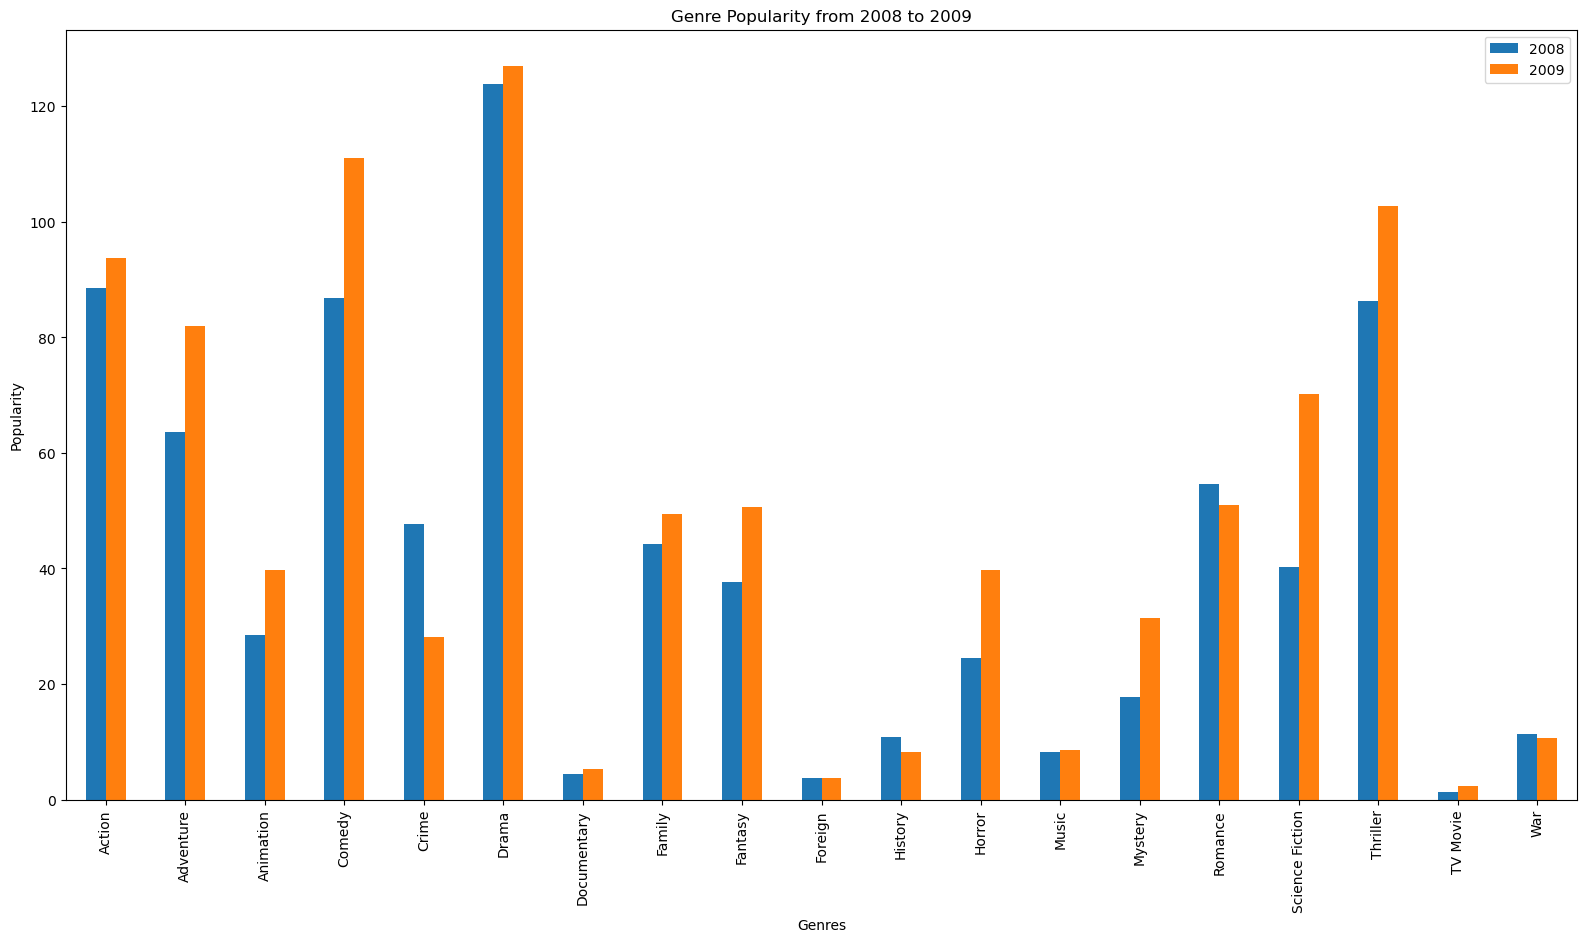

In [1806]:
df_genre_popularity_comparison_1.plot.bar(rot=90, figsize=(19.5,10)) # creates & displays bar graph for "df_genre_popularity_comparison_1" ("rot=90" ensures x-axis label is vertical, so labels can be read)
plt.xlabel('Genres') # adds x-axis label to bar graph
plt.ylabel('Popularity') # adds y-axis label to bar graph
plt.title('Genre Popularity from 2008 to 2009') # adds title to bar graph

The code in _Code 21_ plots and displays the popularity of movie genres from 2008 to 2009 on a bar graph. The bar graph shows the amount of popularity for each genre and which popularities increased, decreased, or stayed the same from 2008 to 2009. 

The graph eases the difficulty of making comparisons about which genres are most popular from year to year and provides support for conclusions about the results.


(**_Conclusion for 1st question_ TEMPORARY PLACE**)

(**_Method:_**) The method that is used to find the most popular genres from year to year is first finding which genre popularities either increased or stayed the same between two consecutive years. Then finding which of those genres had the most popularity for the same consecutive years.

(**_Findings:_**) Based on the results of the first bar graph shown in _Cell 21_, fourteen genres increased in popularity, four genres decreased in popularity, and one genre had the same popularity from 2008 to 2009.

The genres that had an increase in popularity were _Action_, _Adventure_, _Animation_, _Comedy_, _Drama_, _Documentary_, _Family_, _Fantasy_, _Horror_, _Music_, _Mystery_, _Science Fiction_, _Thriller_, and _TV Movie_. 

The genres that had a decrease in popularity were _Crime_, _History_, _Romance_, _War_.

And the only genre that stayed the same in popularity was _Foreign_.

(**_Results found:_**) These results narrow down the most popular genres to be _Action_, _Adventure_, _Animation_, _Comedy_, _Drama_, _Documentary_, _Family_, _Fantasy_, _Foreign_, _Horror_, _Music_, _Mystery_, _Science Fiction_, _Thriller_, and _TV Movie_. 

(**_Findings:_**) The graph in _Cell 21_ also shows that the genres that had the most popularity from 2008 to 2009 were _Action_, _Comedy_, _Drama_, and _Thriller_.

(**_Results found:_**) This result further narrows down the most popular genres to be  _Action_, _Comedy_, _Drama_, _Thriller_.

These graph results verify that the most popular genres from 2008 and 2009 were **_Action_**, **_Comedy_**, **_Drama_**, and **_Thriller_**. <--- (**_Conclusion for 1st question_ TEMPORARY PLACE**)

One **limitation** to the exploration is that it only checks movies from 2008 to 2011. <--- (**_Limitation for WHOLE 1st question_ TEMPORARY PLACE**)

#### **Cell 22:**

Text(0.5, 1.0, 'Genre Popularity from 2009 to 2010')

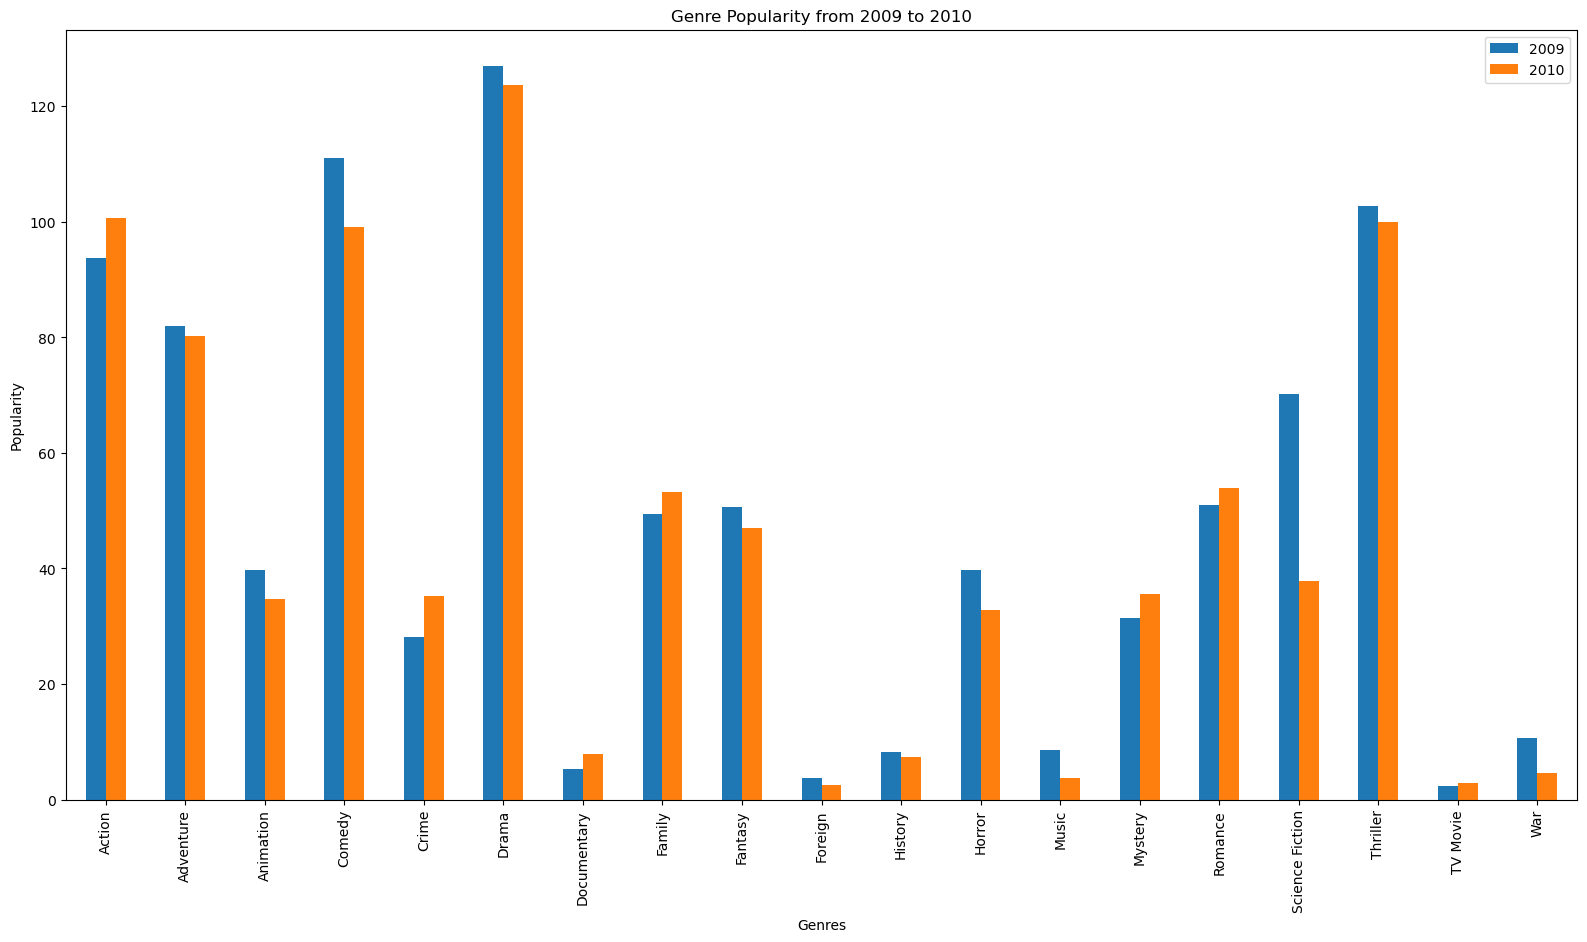

In [1807]:
df_genre_popularity_comparison_2.plot.bar(rot=90, figsize=(19.5,10)) # creates & displays bar graph for "df_genre_popularity_comparison_2" ("rot=90" ensures x-axis label is vertical, so labels can be read)
plt.xlabel('Genres') # adds x-axis label to bar graph
plt.ylabel('Popularity') # adds y-axis label to bar graph
plt.title('Genre Popularity from 2009 to 2010') # adds title to bar graph

The code in _Code 26_ plots the popularity of movie genres from 2009 to 2010. The bar graph shows the amount of genre popularity and which popularities increased and decreased from 2009 to 2010. 

The result shows that the most popular genres during 2008, 2009, 2010, and 2011 were **_Action_**, **_Comedy_**, **_Drama_**, and **_Thriller_**. <--- (**_Conclusion for 1st question_ TEMPORARY PLACE**)

#### **Cell 23:**

Text(0.5, 1.0, 'Genre Popularity from 2009 to 2010')

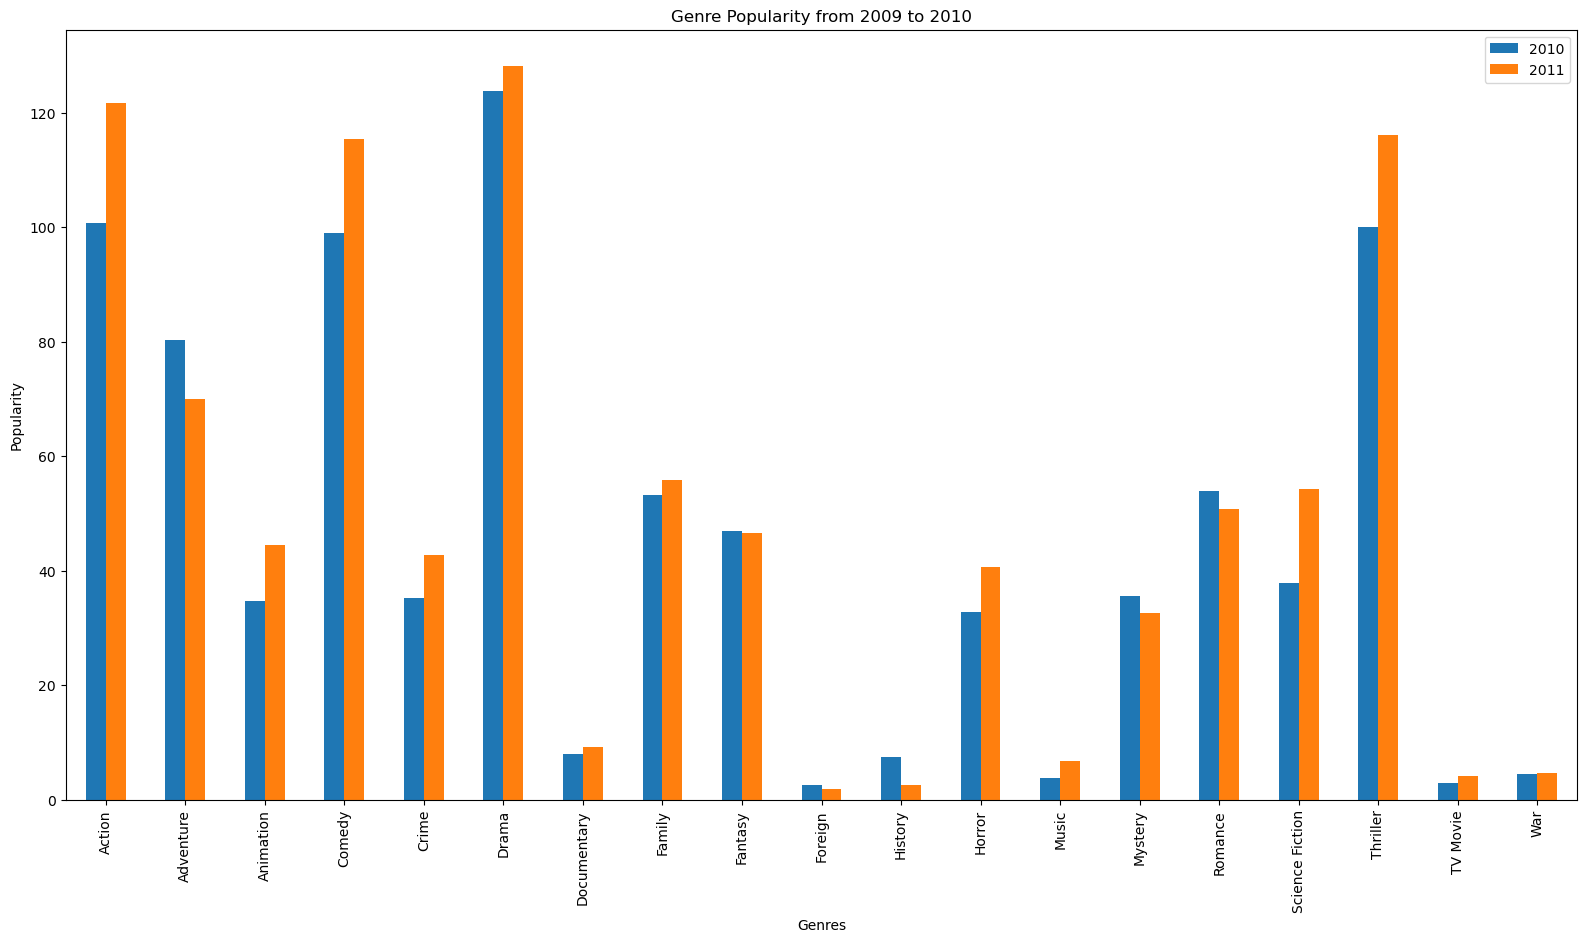

In [1808]:
df_genre_popularity_comparison_3.plot.bar(rot=90, figsize=(19.5,10)) # creates & displays bar graph for "df_genre_popularity_comparison_3" ("rot=90" ensures x-axis label is vertical, so labels can be read)
plt.xlabel('Genres') # adds x-axis label to bar graph
plt.ylabel('Popularity') # adds y-axis label to bar graph
plt.title('Genre Popularity from 2009 to 2010') # adds title to bar graph

The code in _Cell 14_ displays the genre popularity dataframe after the genre popularity values have been added. 

The data in the genre popularity dataframe will be graphed in the next cell to show the increase, decrease, and amount of movie popularity for each genre from 2008 to 2011.

#### **Cell 24:**

#### **Cell 25:**

#### **Cell 26:**

### What movie genre will Tom Cruise most likely to be asked to star in?

#### **Cell 1:**

In [1349]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_2015 = df[df['release_year'] == 2015] # creates dataframe with movies released in 2008

The code in _Cell 1_ creates a new dataframe that holds only movies released in 2015. Since the analysis question asks for movies released in 2015, this will limit the search of movies within 2015.

#### **Cell 2:**

In [1350]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

TC_cast = df_2015['cast'].str.contains('Tom Cruise') # checks if "cast" holds 'Tom Cruise'
DB_cast = df_2015['cast'].str.contains("Dylan O'Brien") # checks if "cast" holds "Dylan O'Brien"
EW_cast = df_2015['cast'].str.contains('Emma Watson') # checks if "cast" holds 'Emma Watson'
JL_cast = df_2015['cast'].str.contains('Jennifer Lawrence') # checks if "cast" holds 'Jennifer Lawrence'

The code in the cell above searches the _cast_ column for the names of the four actors: **Tom Cruise**, **Dylan O'Brien**, **Emma Watson**, and **Jennifer Lawrence**. The analysis question requires information pertaining to the four actors and the movies they starred in. Therefore, the code is used to find what movies the four actors starred in by checking if four actors are in the _cast_ column of each movie.

#### **Cell 3:**

In [1351]:
TC_movies = TC_cast.sum() # finds movie amount "Tom Cruise" played in
DB_movies = DB_cast.sum() # find movie amount "Dylan O'Brien" played in
EW_movies = EW_cast.sum() # finds movie amount "Emma Watson" played in
JL_movies = JL_cast.sum() # finds movie amount "Jennifer Lawrence" played in

The code in _Cell 3_ finds the amount of movies each actor played in. In order to solve the question, the amount of movies each actor played in must be acquired first.

#### **Cell 4:**

In [1359]:
df_movie_and_actors = pd.DataFrame({'Actors' : ['Tom Cruise', "Dylan O'Brien", 'Emma Watson', 'Jennifer Lawrence'], 
                                    'movies' : [TC_movies, DB_movies, EW_movies, JL_movies]},
                                      index=['Tom Cruise', "Dylan O'Brien", 'Emma Watson', 'Jennifer Lawrence']) # creates new dataframe to hold actors & movie amounts
df_movie_and_actors # displays actor and movie amount dataframe

,Actors,movies
Tom Cruise,Tom Cruise,1
Dylan O'Brien,Dylan O'Brien,1
Emma Watson,Emma Watson,1
Jennifer Lawrence,Jennifer Lawrence,3


The code in _Cell 4_ first creates a new dataframe holding the names of the four actors, the amount of movies they acted in, and an index holding the actors' names. Then the code displays the dataframe below the code cell. This dataframe will be used create the graphs that will be used to answer the third analysis question.

#### **Cell 5:**

Text(0, 0.5, 'Number of Movies')

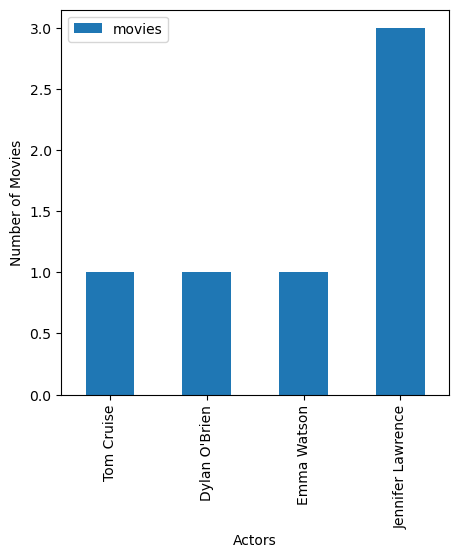

In [1360]:
df_movie_and_actors.plot.bar(x='Actors', y='movies', figsize=(5,5)) # displays bar graph
plt.ylabel('Number of Movies') # adds y-axis label to graph

The code in _Cell 5_ displays a bar graph showing how many movies each actor starred in. The result shows that **_Jennifer Lawrence_** starred in the most movies.

#### **Cell 6:**

<Axes: ylabel='movies'>

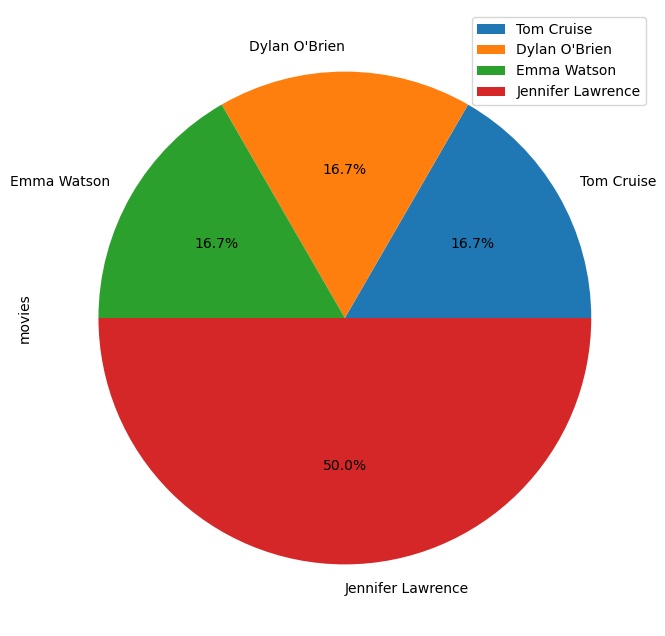

In [1362]:
df_movie_and_actors.plot.pie(y='movies', figsize=(8,8), autopct='%1.1f%%') # displays pie chart (autopct='%1.1f%%' shows percentage)

The code in _Cell 6_ displays a pie chart of the percentage of movies that each actor starred in. This chart takes the total amount of movies that all four actors starred in and compares the percentages to each other, further proving that **_Jennifer Lawrence_** starred in the most movies.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.



#### **Cell 14:**

#### **Cell 15:**

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb